In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import utils
import importlib
import json
from tabulate import tabulate
#from adjustText import adjust_text
importlib.reload(utils)
pd.set_option('display.max_rows', None)

In [2]:
#Define the file paths
file_path_sample_a = r'Data\Task 5\sample a.TKA'
file_path_sample_b = r'Data\Task 5\sample b.TKA'


file_paths = [file_path_sample_a, file_path_sample_b]

#file path for background data
file_path_background = r'Data\Task 3\background 8.0 uS.TKA'

In [3]:
#import the background data
background_df = {}

background_df, total_time_background = utils.load_data(file_path_background)
print('Background Data succesfully imported.')

#Create a dictionary for the object data
object_dict = {}
#Load the data
for file_path in file_paths:
    #Load the data from the file path
    data, total_time = utils.load_data(file_path)

    #Get the name of the element from the file path
    object_name = file_path.split('\\')[-1].split('.')[0].strip().capitalize()
    object_dict[object_name] = data
    
    #Create the Normalized Counts per Second with the background spectrum subtracted, and clip it so there are no negative numbers
    object_dict[object_name]['Normalized Counts per Second'] = object_dict[object_name]['Counts per Second'] - background_df['Counts per Second']
    object_dict[object_name]['Normalized Counts per Second'] = object_dict[object_name]['Normalized Counts per Second'].clip(lower=1e-6)
    # for i in range(0, len(object_dict[object_name])):
    #     print(f"Subracting {object_dict[object_name].loc[i, 'Counts per Second']} - {background_df.loc[i, 'Counts per Second']}")
    # Identify rows where clipping occurred
    clipped_rows = object_dict[object_name][
    (object_dict[object_name]['Counts per Second'] - background_df['Counts per Second']) < 1e-6
]

    # Print the clipped rows
    if not clipped_rows.empty:
        print(f"Clipped entries for {object_name}:")
        print(clipped_rows)
        print(f'Data imported successfully for {object_name}.')

### For debugging ###
#print(object_dict)
#print(background_df)
#print(background_df.dtypes)
type(background_df)

Background Data succesfully imported.
Clipped entries for Sample a:
      Channel  Counts per Second  Counts  Normalized Counts per Second
0           1           0.000000       0                      0.000001
1           2           0.000000       0                      0.000001
2           3           0.000000       0                      0.000001
3868     3869           0.000000       0                      0.000001
3965     3966           0.003333       1                      0.000001
4193     4194           0.000000       0                      0.000001
4376     4377           0.000000       0                      0.000001
4411     4412           0.003333       1                      0.000001
4469     4470           0.016667       5                      0.000001
4471     4472           0.030000       9                      0.000001
4476     4477           0.043333      13                      0.000001
4495     4496           0.000000       0                      0.000001
4580     

pandas.core.frame.DataFrame

In [4]:
calibration_file_path = r'Data\calibration_data.json'
with open(calibration_file_path, 'r') as json_file:
    calibration_data = json.load(json_file)
slope = calibration_data['slope']
intercept = calibration_data['intercept']

def channel_to_energy(channel, slope=slope, intercept=intercept):
    return slope * channel + intercept

for object_name, data in object_dict.items():
    data['Energy (keV)'] = channel_to_energy(data['Channel'])

    ### For debugging ###
    # print(f'Data for {object_name}')
    # print(data.head())
    # print('=' * 50)

C:\Users\kearb\AppData\Local\Temp\ipykernel_75792\997719888.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


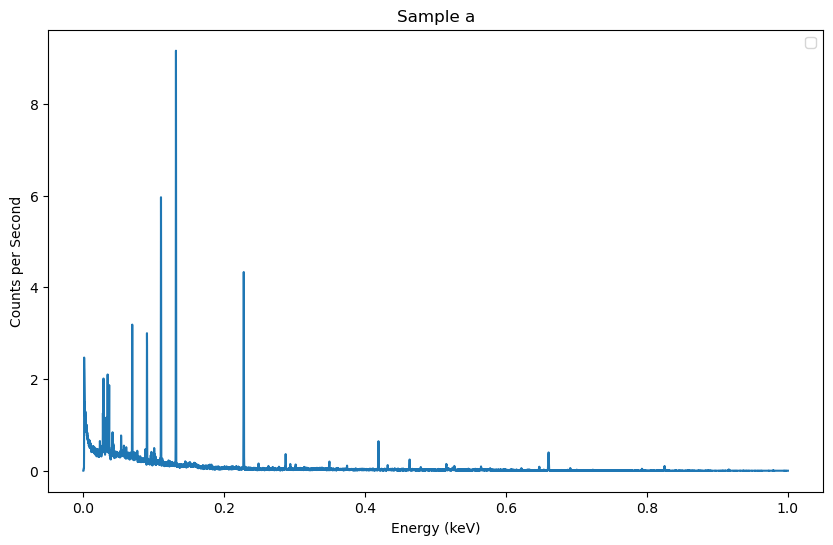

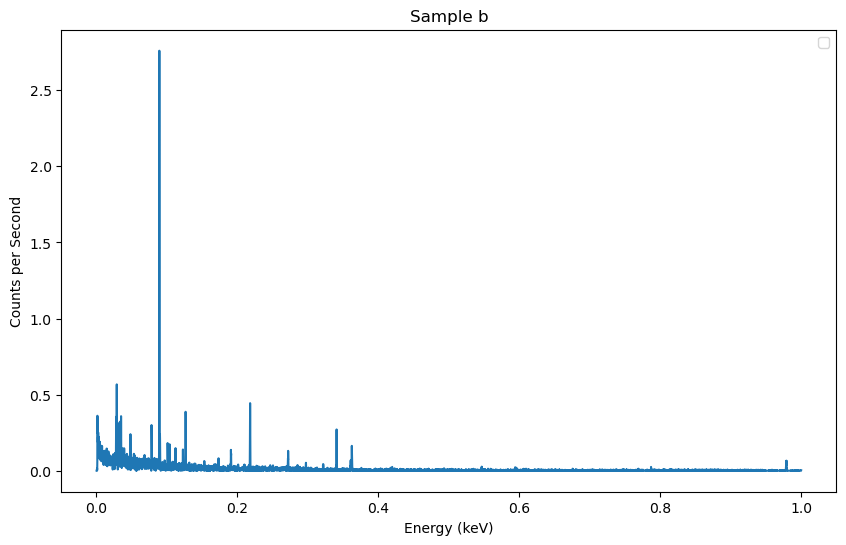

In [5]:
#Preliminary plots for visual data inspection
for object_name, data in object_dict.items():
    plt.figure(figsize=(10,6))
    plt.plot(data['Energy (keV)']/data['Energy (keV)'].max(), data['Normalized Counts per Second'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts per Second')
    if object_name == 'Filter dirt':
        plt.ylim(bottom=0, top=0.3)
    plt.title(object_name)
    plt.legend()
    plt.show()
    plt.close()

In [18]:
#Create the peaks_dict
peaks_dict = {}

#Call the peak_finder_simple function
for object_name, data in object_dict.items():
    peaks_dict = utils.find_peaks_simple(data=object_dict, start_channel=25, channel_step=50, cutoff_value = 0.25, threshold_factor=2)

#peaks_dict = utils.find_peaks_simple(data={'Background': background_dict}, start_channel=5, channel_step=25, cutoff_value = 0.013, threshold_factor=2)

# Remove the row where 'Energy (keV)' == 1765 for a specific sample
sample = 'Sample a'  # Replace with your sample name
peaks_dict[sample] = peaks_dict[sample][peaks_dict[sample]['Channel'] != 5408.0]


Data type: <class 'dict'>
Data keys: dict_keys(['Sample a', 'Sample b'])
Peak found for Sample a at channel 235 with value 2.010555555555556 (Max: 2.010555555555556, Avg: 0.7027777777777778)
Peak found for Sample a at channel 283 with value 2.098888888888889 (Max: 2.098888888888889, Avg: 0.7826)
Peak found for Sample a at channel 439 with value 0.768888888888889 (Max: 0.768888888888889, Avg: 0.3825888888888889)
Peak found for Sample a at channel 569 with value 3.1866666666666665 (Max: 3.1866666666666665, Avg: 0.5307777777777777)
Peak found for Sample a at channel 740 with value 2.9994444444444444 (Max: 2.9994444444444444, Avg: 0.41267777777777775)
Peak found for Sample a at channel 824 with value 0.495 (Max: 0.495, Avg: 0.2121333333333333)
Peak found for Sample a at channel 903 with value 5.964444444444444 (Max: 5.964444444444444, Avg: 0.5467111111111111)
Peak found for Sample a at channel 1077 with value 9.16 (Max: 9.16, Avg: 0.6110111111111112)
Peak found for Sample a at channel 1865

C:\Users\kearb\AppData\Local\Temp\ipykernel_75792\1092163420.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


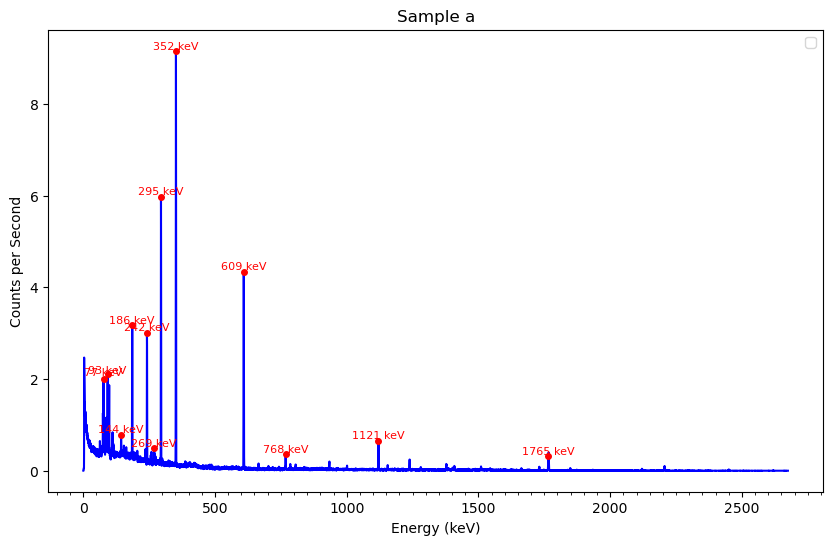

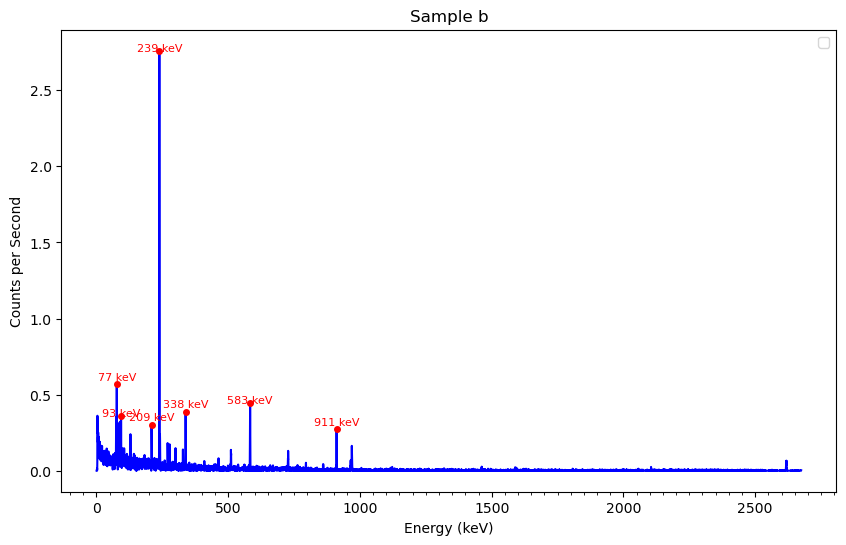

In [19]:
#Replot the data with the peaks



for object_name, data in object_dict.items():
    #First, extract the peak data
    peak_energies = peaks_dict[object_name]['Energy (keV)'].to_numpy()
    peak_counts = peaks_dict[object_name]['Normalized Counts per Second'].to_numpy()

    #convert peak channel to peak_energy

    #Create the plots
    plt.figure(figsize=(10,6))
    plt.plot(data['Energy (keV)'], data['Normalized Counts per Second'], color='blue')
    for i, (x, y) in enumerate(zip(peak_energies, peak_counts)):
        if y > 0.00:  # Only label significant peaks
            x_rounded = round(x, 0)
            offset = 0.015 if i % 2 == 0 else -0.015  # Alternate label positions
            plt.text(x, y + offset, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
            plt.plot(x, y, 'ro', markersize=4)
    # for x, y in zip(peak_energies, peak_counts):
    #     x_rounded = round(x, 0)
    #     if x_rounded == 186:
    #         plt.text(x, y+.015, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='top', color='red', zorder=1)    
    #     else:
    #         if x_rounded == 242:
    #             plt.text(x, y-0.015, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red', zorder=1)
    #         else:
    #             plt.text(x, y+.005, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red', zorder=1)
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts per Second')
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))
    plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(50))
    if object_name == 'Filter dirt':
        plt.ylim(bottom=0, top=0.3)
    plt.title(object_name)
    plt.legend()
    plt.show()
    plt.close()


In [17]:
print(peaks_dict['Sample a'])

      Channel  Counts per Second  Counts  Normalized Counts per Second  \
234     235.0           2.120000   636.0                      2.010556   
282     283.0           2.213333   664.0                      2.098889   
438     439.0           0.856667   257.0                      0.768889   
568     569.0           3.260000   978.0                      3.186667   
739     740.0           3.050000   915.0                      2.999444   
823     824.0           0.520000   156.0                      0.495000   
902     903.0           6.020000  1806.0                      5.964444   
1076   1077.0           9.223333  2767.0                      9.160000   
1864   1865.0           4.383333  1315.0                      4.333333   
2351   2352.0           0.370000   111.0                      0.362778   
3430   3431.0           0.656667   197.0                      0.643333   
5404   5405.0           0.340000   102.0                      0.331667   
5407   5408.0           0.403333   121

In [20]:
print(peaks_dict['Sample b'])

      Channel  Counts per Second  Counts  Normalized Counts per Second  \
234     235.0           0.676667   203.0                      0.567222   
284     285.0           0.470000   141.0                      0.358333   
638     639.0           0.353333   106.0                      0.300000   
729     730.0           2.866667   860.0                      2.759444   
1034   1035.0           0.420000   126.0                      0.387222   
1784   1785.0           0.480000   144.0                      0.443889   
2789   2790.0           0.286667    86.0                      0.271111   

      Energy (keV)  
234      76.972162  
284      93.299287  
638     208.895334  
729     238.610702  
1034    338.206166  
1784    583.113045  
2789    911.288262  
